In [1]:
#! pip install translate
import pandas as pd, numpy as np, xlsxwriter, matplotlib.pyplot as plt, seaborn as sns, os, math
from datetime import datetime as dt
from openpyxl import load_workbook
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from notifypy import Notify
notification = Notify()
from googletrans import Translator
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\n*****Required libraries imported*****")


*****Required libraries imported*****


# Mention project raw data filename below

In [2]:
# Asking for project ID from the user
file_Name = input('Please enter file name = ')

# Asking for project ID from the user
PID = input('Please provide PID of project = ')

Please enter file name =  cases_report_LTPCT (Ahwa &amp; Vikramgad)_(All States)_2024-11-18.csv
Please provide PID of project =  PID/LARSE2/2024/Custom/YK/0425


In [3]:
def csvORexcel():
    global path
    path = "C:\\Python\\read\\"+file_Name
    try:
        if file_Name.split('.')[-1].startswith('c'):
            df = pd.read_csv(path)
            return df
        elif file_Name.split('.')[-1].startswith('x'):
            df = pd.read_excel(path)
            return df
    except FileNotFoundError:
        print("The file name {0} has not found".format(path))

fn = file_Name

In [5]:
exe_start = dt.now() # Recording execution start time
data0 = csvORexcel() # Reading exce/csv file
init_file_size = round(os.path.getsize(path)/1000000,2) # Getting excel file size
#data0 = pd.read_excel(r'C:\Users\akash\Documents\Haqdarshak\Work\Nassscom\1.0\cases_report__1_Nasscom1_uniques_till_27_Feb.xlsx', "Unique DI Data")
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,Case Organization,Case District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID
0,EP04AUBQ,25-Jul-2024,Work Demand under MGNREGS_(Central),SH0009QE,Open,NaN,NaN,Not Suspected,MH - LTPCT (Ahwa & Vikramgad),PALGHAR,PN04B05I,Pratibha Rupesh Sahare,F,9.527354e+09,21.0,VIKRAMGAD,Man,PG041TOC,Sahare,manoj.ghodvinde,Manoj Vilas Ghodvinde,Mamata Sambare,21373.0
1,EP049LGG,25-Jun-2024,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Data complete,NaN,NaN,Not Suspected,MH - LTPCT (Ahwa & Vikramgad),PALGHAR,PN04A8HF,Ashok Dattu Thapad,M,8.669237e+09,42.0,VIKRAMGAD,Zadapoli,PG0411W6,Thapad,eknath.baraf,Eknath Sakharam Baraf,Roshan Shelar,21125.0
2,EP049LR2,25-Jun-2024,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Data complete,NaN,NaN,Not Suspected,MH - LTPCT (Ahwa & Vikramgad),PALGHAR,PN04A8PF,Tejaswini Rashik Paradhi,F,9.011743e+09,15.0,VIKRAMGAD,Pochade,PG04124C,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0
3,EP049LRB,25-Jun-2024,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Data complete,NaN,NaN,Not Suspected,MH - LTPCT (Ahwa & Vikramgad),PALGHAR,PN04A8PL,Rashik Madhukar Paradhi,M,9.011743e+09,44.0,VIKRAMGAD,Pochade,PG04124M,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0
4,EP049LRP,25-Jun-2024,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Data complete,NaN,NaN,Not Suspected,MH - LTPCT (Ahwa & Vikramgad),PALGHAR,PN04A8PU,Pramila Rashik Paradhi,F,9.011743e+09,38.0,VIKRAMGAD,Pochade,PG04124W,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Case Id                11403 non-null  object 
 1   Createdon              11402 non-null  object 
 2   Scheme/Doc             11402 non-null  object 
 3   Scheme/Doc GUID        11402 non-null  object 
 4   Status                 11402 non-null  object 
 5   Docket Submitted Date  10231 non-null  object 
 6   Benefit received Date  9134 non-null   object 
 7   HD Suspected Cases     11402 non-null  object 
 8   Case Organization      11402 non-null  object 
 9   Case District          11402 non-null  object 
 10  Citizen GUID           11402 non-null  object 
 11  Citizen Name           11402 non-null  object 
 12  Gender                 11402 non-null  object 
 13  Mobile                 11402 non-null  float64
 14  Age                    11402 non-null  float64
 15  Ci

In [7]:
states = {'AP':'Andhra Pradesh',
'AR':'Arunachal Pradesh',
'AS':'Assam',
'BR':'Bihar',
'BH':'Bihar',
'CT':'Chhattisgarh',
'CG':'Chhattisgarh',
'DL':'Delhi', 
'GA':'Goa',
'GJ':'Gujarat',
'HR':'Haryana',
'HP':'Himachal Pradesh',
'JH':'Jharkhand',
'KA':'Karnataka',
'KL':'Kerala',
'MP':'Madhya Pradesh',
'MH':'Maharashtra',
'MN':'Manipur',
'ML':'Meghalaya',
'MZ':'Mizoram',
'NL':'Nagaland',
'OR':'Odisha',
'PB':'Punjab',
'RJ':'Rajasthan',
'SK':'Sikkim',
'TN':'Tamil Nadu',
'TG':'Telangana',
'TR':'Tripura',
'UP':'Uttar Pradesh',
'UT':'Uttarakhand',
'WB':'West Bengal'}

# Data Cleaning

In [8]:
# Defining a function to remove extra spaces between words.
def rem_space(x):
    try:
        n = x.strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    except AttributeError:
        n = str(x).strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    
    name = '' # Decalring a empty name
    
    for w in n:
        if w != '': # This will execute if non empty word found
            if name == '': # This will run if "name" variable is empty
                name = w # Storing name into "name" variable.
            else: # This will run if "name" variable is not empty
                name = name + ' ' + w # Joining the names with single spaces.
    
    return name

In [9]:
# Remove last row.
data0.drop(index = data0[data0.Createdon.isna()].index, inplace=True)

# Replace null values
data0['Scheme/Doc'].fillna('a', inplace=True)
data0['Citizen Name'].fillna('a', inplace=True)
data0['HD Name'].fillna('blank', inplace=True)
data0.Mobile.fillna(0, inplace=True)

# Changing status values and keeping only "Open/Submit/BR"
data0['Status'] = data0['Status'].apply(lambda x: 'Open' if x == 'Data complete' else 'Submitted' if (x=='Docket submitted' or x=='Document ready') else "Benefit Received" if x=='Scheme/Document received' else x)

# Changing Case Organization values from state initials to full state name.
data0['Case Organization'] = data0['Case Organization'].apply(lambda x: states[x[:2]])

# Renaming column "Case Organiisation" & "Case District" to "State" & "Disctrict"
data0.rename(columns={"Case Organization":"State","Case District":"District"}, inplace=True)

# Removing extra spaces in Opsco name 
data0['Opsco name'] = data0['Opsco name'].apply(lambda x: rem_space(x))

# Convert Mobile column from float to string for concatenation.
data0['Mobile'] = data0['Mobile'].apply(lambda x: str(x).strip())

# Change gender from initial letter to full form.
data0['Gender'] = data0['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female' if x=='F' else 'Other' if x=='O' else x)

# Convert "Createdon", "Docket Submitted Date", "Benefit received Date" column data type to Datetime format
dt_col = ['Createdon', 'Docket Submitted Date', 'Benefit received Date', 'DOB']

for col in dt_col:
    try:
        data0[col] = pd.to_datetime(data0[col], format='mixed', errors='ignore')
        #data0[col] = data0[col].apply(lambda x: x.strftime('%d-%m-%Y') if type(x) != pd._libs.tslibs.nattype.NaTType else x)
    except KeyError:
        continue


# Deleting records with status "Case Aborted" and "Application rejected"
rejectedDF = data0[(data0.Status == 'Case Aborted') | (data0.Status == 'Application rejected')] # Storing prev step deleted data
data0 = data0[(data0['Status'] != 'Case Aborted') & (data0['Status'] != 'Application rejected')]

data0.reset_index(inplace=True, drop=True)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case Id                11261 non-null  object        
 1   Createdon              11261 non-null  datetime64[ns]
 2   Scheme/Doc             11261 non-null  object        
 3   Scheme/Doc GUID        11261 non-null  object        
 4   Status                 11261 non-null  object        
 5   Docket Submitted Date  10226 non-null  datetime64[ns]
 6   Benefit received Date  9133 non-null   datetime64[ns]
 7   HD Suspected Cases     11261 non-null  object        
 8   State                  11261 non-null  object        
 9   District               11261 non-null  object        
 10  Citizen GUID           11261 non-null  object        
 11  Citizen Name           11261 non-null  object        
 12  Gender                 11261 non-null  object        
 13  M

# Translate local language district name to English

### Custom translator

In [10]:
def Trans(x):
    t = Translator()
    attempt = 0
    max_attempts = 5
    alph = [chr(i) for i in range(65,122)]

    while attempt < max_attempts:
        if x[0] not in alph:
            try:
                xlated = t.translate(x)
                return xlated.text
            except AttributeError as e:
                if 'raise_Exception' in str(e):
                    print(f"Encountered rate limit error, attempt {attempt+1}/{max_attempts}. Retrying in 8 seconds...")
                    time.sleep(8)
                    attempt += 1
                else:
                    raise
            except Exception as e:
                print(e)
                break
            return "Failed to translate after multiple attempts."
        else:
            return x.title()

dist = {}

for d in data0['District'].value_counts().index:
    if d in dist.keys():
        break
    else:
        dist[d] = Trans(d)

dist

{'PALGHAR': 'Palghar',
 'DANG': 'Dang',
 'पालघर': 'Palghar',
 'Palghar': 'Palghar'}

In [11]:
# Renaming Case District name from local language to english

data0['District'] = data0['District'].apply(lambda x: "Dohad" if x=="દોહદ" else "Haridwar" if x=="हरिद्वार" else "UDHAM SINGH NAGAR".title() if (x=="उदम सिंह नगर" or x=="Udam Singh Nagar" or x=="UDAM SINGH NAGAR")
                             else "Sitamarhi" if x=="सीतामढ़ी" else "Mahasamund" if (x=="महासमुंद" or x=="Mahasamand")
                             else "Rajgarh" if x=="राजगढ़" else "Muzaffarpur" if x=="मुजफ्फरपुर" else "Nawada" if x=="नवादा" else "Balrampur" if x=="बलरामपुर"
                             else "DAMOH".title() if x=="दमोह" else "Shravasti" if x=="श्रावस्ती" else "NARMADA".title() if x=="નર્મદા" else "Chhatarpur" if (x=="छतरपुर" or x=="Chhattarpur")
                             else 'East Singhbum' if x=='ईस्ट सिंघबम' else 'Chhindwara' if x=='छिंदवारा' else 'Jalna' if x=='जालना' else 'Dhule' if x=='धुळे' else "Dhanbad" if x=="धनबाद"
                             else 'Banas Kantha' if x=='બનાસ કાંઠા' else 'Dhamtari' if x=='धमतरी' else 'Bilaspur' if x=='बिलासपुर' else dist[x])

data0['District'].value_counts()

District
Palghar    5729
Dang       5532
Name: count, dtype: int64

# Mention orgwise scheme applied raw data filename below

In [12]:
file_Name = 'orgwise_schemes_applied.xlsx'

In [13]:
# Importing Schemes data from Orgwise schemes applied report
schemeDetails = csvORexcel()
schemeDetails = schemeDetails[~schemeDetails['Parent Scheme GUID'].isna()]
schemeDetails = schemeDetails[schemeDetails['Project Id'] == PID]
schemeDetails.head()

,State,Org Name,Project Id,Scheme Id,status,Parent Scheme GUID,Parent Scheme,Scheme Name,Scheme type,Fee,Timeline,Benefit Value,Open,Submitted,Received
567,Gujarat,GJ - LTPCT (Ahwa & Vikramgad),PID/LARSE2/2024/Custom/YK/0425,DC0000YW,6,PDC0009K4,Pan Card,Pan Card (Central),doc,43,15,200,33,33.0,33.0
568,Gujarat,GJ - LTPCT (Ahwa & Vikramgad),PID/LARSE2/2024/Custom/YK/0425,SH00066J,5,PSH0009KS,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Mukhya Mantri Amrutam Yojana (Ayushman Bharat)_GJ,sch,100,NaN,86564,1227,1094.0,915.0
569,Gujarat,GJ - LTPCT (Ahwa & Vikramgad),PID/LARSE2/2024/Custom/YK/0425,SH0009HD,5,PDC0009K5,E-Shram Card,E-Shram Card (Central),sch,0,1,110033,189,185.0,185.0
570,Gujarat,GJ - LTPCT (Ahwa & Vikramgad),PID/LARSE2/2024/Custom/YK/0425,SH0006KK,5,PSH000B0G,Aadhaar update/correction,Aadhar Card update (Central),doc,100,30,50,217,205.0,130.0
571,Gujarat,GJ - LTPCT (Ahwa & Vikramgad),PID/LARSE2/2024/Custom/YK/0425,DC0000YY,5,PDC0009LK,Aadhaar card,Aadhaar Card (Central),doc,0,90,50,26,26.0,7.0


In [14]:
# Removing colomuns except 'Scheme Id','Scheme type','Benefit Value' to merge with main dataframe
for s in schemeDetails.columns:
    if s not in ['Scheme Id','Scheme type','Benefit Value','Parent Scheme']:
        schemeDetails.drop(columns=s, inplace=True)

# Merging scheme details with main dataframe to get data of Scheme type & Benefit Value.
data0 = data0.merge(schemeDetails.drop_duplicates(subset=['Scheme Id'], keep='last'), left_on='Scheme/Doc GUID', right_on="Scheme Id", how='left')

# Removing non required column "Scheme ID"
data0.drop(columns = 'Scheme Id', inplace=True)

# Changing short form to "Scheme" & "Document"
data0['Scheme type'] = data0['Scheme type'].apply(lambda x: 'Scheme' if x=='sch' else 'Document' if x=='doc' else x)

# Converting "Benefit Value" columns to integer type
data0['Benefit Value'].fillna('0', inplace=True)
data0['Benefit Value'] = data0['Benefit Value'].apply(lambda x: int(x) if x.isnumeric() else 0)
data0['Benefit Value'] = data0['Benefit Value'].astype('int64')

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value
0,EP04AUBQ,2024-07-25,Work Demand under MGNREGS_(Central),SH0009QE,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04B05I,Pratibha Rupesh Sahare,Female,9527354457.0,21.0,VIKRAMGAD,Man,PG041TOC,Sahare,manoj.ghodvinde,Manoj Vilas Ghodvinde,Mamata Sambare,21373.0,Work demand under MGNREGA,Scheme,49861
1,EP049LGG,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8HF,Ashok Dattu Thapad,Male,8669236643.0,42.0,VIKRAMGAD,Zadapoli,PG0411W6,Thapad,eknath.baraf,Eknath Sakharam Baraf,Roshan Shelar,21125.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564
2,EP049LR2,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PF,Tejaswini Rashik Paradhi,Female,9011743208.0,15.0,VIKRAMGAD,Pochade,PG04124C,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564
3,EP049LRB,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PL,Rashik Madhukar Paradhi,Male,9011743208.0,44.0,VIKRAMGAD,Pochade,PG04124M,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564
4,EP049LRP,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PU,Pramila Rashik Paradhi,Female,9011743208.0,38.0,VIKRAMGAD,Pochade,PG04124W,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564


In [15]:
# Checking if number of data point has increased or not
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case Id                11261 non-null  object        
 1   Createdon              11261 non-null  datetime64[ns]
 2   Scheme/Doc             11261 non-null  object        
 3   Scheme/Doc GUID        11261 non-null  object        
 4   Status                 11261 non-null  object        
 5   Docket Submitted Date  10226 non-null  datetime64[ns]
 6   Benefit received Date  9133 non-null   datetime64[ns]
 7   HD Suspected Cases     11261 non-null  object        
 8   State                  11261 non-null  object        
 9   District               11261 non-null  object        
 10  Citizen GUID           11261 non-null  object        
 11  Citizen Name           11261 non-null  object        
 12  Gender                 11261 non-null  object        
 13  M

# Mention rate card raw data file name below

In [16]:
file_Name = 'rate_card.xlsx'

In [17]:
rate_card = csvORexcel()
rate_card = rate_card[rate_card['Org_PID'] == PID].sort_values('created_on')
rate_card.head()

,Org_PID,Org_Name,org_id,schemes_Guid,sch_name,sch id,ratecard_guid,open_price,Docket submitted price,scheme_document_received price,created_on
68252,PID/LARSE2/2024/Custom/YK/0425,GJ - LTPCT (Ahwa & Vikramgad),1503,SH000A6A,I-Farmer Assistance of Stipend under Poultry H...,13186,RC00W7VW,0.0,25.0,10.0,2024-06-22 07:15:26
68294,PID/LARSE2/2024/Custom/YK/0425,GJ - LTPCT (Ahwa & Vikramgad),1503,SH00018R,Pradhan Mantri Jan Dhan Yojana (Central),1611,RC00W7VW,0.0,25.0,10.0,2024-06-22 07:15:26
68308,PID/LARSE2/2024/Custom/YK/0425,GJ - LTPCT (Ahwa & Vikramgad),1503,SH0004IH,Pre-Matric Scholarship for ST students (Central),5849,RC00W7VW,0.0,25.0,10.0,2024-06-22 07:15:26
68305,PID/LARSE2/2024/Custom/YK/0425,GJ - LTPCT (Ahwa & Vikramgad),1503,SH0000HB,Pradhan Mantri Ujjwala Yojana (Central),623,RC00W7VW,0.0,25.0,10.0,2024-06-22 07:15:26
68266,PID/LARSE2/2024/Custom/YK/0425,GJ - LTPCT (Ahwa & Vikramgad),1503,SH0004FT,Indira Gandhi National Old Age Pension_GJ,5753,RC00W7VW,0.0,25.0,10.0,2024-06-22 07:15:26


In [18]:
# Defining a function for HD payment calculation which will take cases report and rate card as input and return final cases report with hd payment column

def hdPayment(data0, rate_card):
    price = {'index':[], 'Scheme/Doc GUID':[], 'open_price':[], 'Docket submitted price':[], 'scheme_document_received price':[]} # Declaring a blank dictionary for storing price.
    
    for SID, di in zip(data0['Scheme/Doc GUID'], data0['Scheme/Doc GUID'].index): # Getting Scheme GUID and index number from schemes data.
        price['Scheme/Doc GUID'].append(SID) # Storing Scheme GUID from schemes data.
        price['index'].append(di) # Storing index number from schemes data.
        rate_sch = rate_card[rate_card.schemes_Guid == SID].sort_values('created_on') # Storing scheme GUID based filtered data from rate_card.
        rate_sch['created_on'] = rate_sch.created_on.apply(lambda x: x.strftime("%d-%m-%Y"))
        for d in rate_sch.created_on: # To check if multiple rates present under single scheme GUID based on rate card createdon date.
            date_sch = rate_sch[rate_sch.created_on == d].sort_values('created_on') # Get all records for same date.
            if date_sch.shape[0] > 1:
                rate_sch.drop(index = date_sch.index.min(), inplace=True) # Keep only latest record based on index number.
        rate_sch.created_on = pd.to_datetime(rate_sch.created_on, format='mixed', errors='ignore')
        if rate_sch.shape[0] > 1: # Checking if filtered data has more than 1 results.
            for i in rate_sch.index: # Iterating through filtered results.
                if data0.Createdon.loc[di] >= rate_sch.created_on.iloc[-1]: # Checking if cases created date is later than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.iloc[-1]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].iloc[-1]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].iloc[-1]) # Storing BR price from rate card to "price" dictionary.
                    #print('for if = {0} >= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.iloc[-1]))
                    break
                elif data0.Createdon.loc[di] <= rate_sch.created_on.loc[i]: # Checking if cases created date is earlier than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.loc[i]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[i]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[i]) # Storing BR price from rate card to "price" dictionary.
                    #print('for elif = {0} <= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.loc[i]))
                    break
        else: # This will execute if filtered data has only single result.
            #print(SID)
            try:
                price['open_price'].append(rate_sch.open_price.loc[rate_sch.index[0]]) # Storing open price from rate card to "price" dictionary.
                price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[rate_sch.index[0]]) # Storing DS price from rate card to "price" dictionary.
                price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[rate_sch.index[0]]) # Storing BR price from rate card to "price" dictionary.
                #print('if-else')
            except: # This will execute if Scheme not available in rate card under selected PID
                #print(SID)
                price['open_price'].append(0)
                price['Docket submitted price'].append(0)
                price['scheme_document_received price'].append(0)
    
    price = pd.DataFrame(price) # Converting price dictionary to pandas dataframe.
    data0 = data0.merge(price.drop(columns=['Scheme/Doc GUID']), left_on=data0.index, right_on='index', how='left') # Merging "price" datafram with "cases report".
    data0.drop(columns=['index'], inplace=True) # Removing index column
    data0['HD_Payment'] = data0.open_price + data0['Docket submitted price'] + data0['scheme_document_received price'] # Adding column for HD payment.
    return data0

In [19]:
data0 = hdPayment(data0, rate_card)
rejectedDF = hdPayment(rejectedDF, rate_card)

In [20]:
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment
0,EP04AUBQ,2024-07-25,Work Demand under MGNREGS_(Central),SH0009QE,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04B05I,Pratibha Rupesh Sahare,Female,9527354457.0,21.0,VIKRAMGAD,Man,PG041TOC,Sahare,manoj.ghodvinde,Manoj Vilas Ghodvinde,Mamata Sambare,21373.0,Work demand under MGNREGA,Scheme,49861,0.0,10.0,25.0,35.0
1,EP049LGG,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8HF,Ashok Dattu Thapad,Male,8669236643.0,42.0,VIKRAMGAD,Zadapoli,PG0411W6,Thapad,eknath.baraf,Eknath Sakharam Baraf,Roshan Shelar,21125.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0
2,EP049LR2,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PF,Tejaswini Rashik Paradhi,Female,9011743208.0,15.0,VIKRAMGAD,Pochade,PG04124C,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0
3,EP049LRB,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PL,Rashik Madhukar Paradhi,Male,9011743208.0,44.0,VIKRAMGAD,Pochade,PG04124M,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0
4,EP049LRP,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PU,Pramila Rashik Paradhi,Female,9011743208.0,38.0,VIKRAMGAD,Pochade,PG04124W,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0


In [21]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         11261 non-null  object        
 1   Createdon                       11261 non-null  datetime64[ns]
 2   Scheme/Doc                      11261 non-null  object        
 3   Scheme/Doc GUID                 11261 non-null  object        
 4   Status                          11261 non-null  object        
 5   Docket Submitted Date           10226 non-null  datetime64[ns]
 6   Benefit received Date           9133 non-null   datetime64[ns]
 7   HD Suspected Cases              11261 non-null  object        
 8   State                           11261 non-null  object        
 9   District                        11261 non-null  object        
 10  Citizen GUID                    11261 non-null  object        
 11  Ci

# DFL Schemes

- SH0009SW = Digital productivity Service_ Basic
- SH000BM6 = Digital productivity Service_Basic
- SH000AG6 = Digital Productivity Services_Advanced
- SH000A32 = Long Training on Digital & Financial Inclusion_Private
- SH0009SW = Short Training on Digital & Financial Inclusion_Private
- SH000AG6 = Digital Productivity Services and and employability training_Advanced

# Removing DFL data

In [22]:
# Adding column "Scheme Type" to differentiate Schemes and DFL
data0["Scheme Category"] = data0['Scheme/Doc GUID'].apply(lambda x: "DFL" if (x=="SH0009SW" or x=="SH000AG6" or x=="SH000A32" or x=="SH0009SW" or x=="SH000AG6" or x=="SH000BM6") else "E-Gov")
og_DF=data0.copy()
dfl = data0[(data0['Scheme/Doc GUID'] == 'SH0009SW') | (data0['Scheme/Doc GUID'] == 'SH000AG6') | (data0['Scheme/Doc GUID'] == 'SH000A32') | (data0['Scheme/Doc GUID']=='SH0009SW') | (data0['Scheme/Doc GUID']=='SH000AG6') | (data0['Scheme/Doc GUID']=='SH000BM6')]
data0 = data0[(data0['Scheme/Doc GUID'] != 'SH0009SW') & (data0['Scheme/Doc GUID'] != 'SH000AG6') & (data0['Scheme/Doc GUID'] != 'SH000A32') & (data0['Scheme/Doc GUID']!='SH0009SW') & (data0['Scheme/Doc GUID']!='SH000AG6') & (data0['Scheme/Doc GUID']!='SH000BM6')]
print("DFL Count={0}\nE-Gov Count={1}".format(len(dfl),len(data0)))

DFL Count=0
E-Gov Count=11261


In [23]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         11261 non-null  object        
 1   Createdon                       11261 non-null  datetime64[ns]
 2   Scheme/Doc                      11261 non-null  object        
 3   Scheme/Doc GUID                 11261 non-null  object        
 4   Status                          11261 non-null  object        
 5   Docket Submitted Date           10226 non-null  datetime64[ns]
 6   Benefit received Date           9133 non-null   datetime64[ns]
 7   HD Suspected Cases              11261 non-null  object        
 8   State                           11261 non-null  object        
 9   District                        11261 non-null  object        
 10  Citizen GUID                    11261 non-null  object        
 11  Ci

# Duplicate Column

In [24]:
# Filling missing values of "Parent Scheme" from "Scheme/Doc" column
for i in data0[data0['Parent Scheme'].isna()].index:
    data0['Parent Scheme'][i] = data0['Scheme/Doc'][i]
    
# Creating column with name 'duplicate' by concatenation
data0['Mobile'] = data0['Mobile'].astype('str')
data0['duplicate'] = data0['Scheme/Doc'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
dfl['duplicate'] = dfl['Scheme/Doc'] + dfl['Citizen Name'] + dfl['Mobile']
data0['duplicate'] = data0['duplicate'].apply(lambda x: x.lower()) # Converting duplicate column in lower case because python considers ASCII values of each character while checking for duplicates.
dfl['duplicate'] = dfl['duplicate'].apply(lambda x: x.lower())
data0['parent_duplicate'] = data0['Parent Scheme'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
data0['parent_duplicate'] = data0['parent_duplicate'].apply(lambda x: x.lower())
data0.Mobile = data0.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type
#dfl.Mobile = dfl.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate,parent_duplicate
0,EP04AUBQ,2024-07-25,Work Demand under MGNREGS_(Central),SH0009QE,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04B05I,Pratibha Rupesh Sahare,Female,9527354457,21.0,VIKRAMGAD,Man,PG041TOC,Sahare,manoj.ghodvinde,Manoj Vilas Ghodvinde,Mamata Sambare,21373.0,Work demand under MGNREGA,Scheme,49861,0.0,10.0,25.0,35.0,E-Gov,work demand under mgnregs_(central)pratibha ru...,work demand under mgnregapratibha rupesh sahar...
1,EP049LGG,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8HF,Ashok Dattu Thapad,Male,8669236643,42.0,VIKRAMGAD,Zadapoli,PG0411W6,Thapad,eknath.baraf,Eknath Sakharam Baraf,Roshan Shelar,21125.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0,E-Gov,pradhan mantri jan arogya yojana (ayushman bha...,pradhan mantri jan arogya yojana (ayushman bha...
2,EP049LR2,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PF,Tejaswini Rashik Paradhi,Female,9011743208,15.0,VIKRAMGAD,Pochade,PG04124C,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0,E-Gov,pradhan mantri jan arogya yojana (ayushman bha...,pradhan mantri jan arogya yojana (ayushman bha...
3,EP049LRB,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PL,Rashik Madhukar Paradhi,Male,9011743208,44.0,VIKRAMGAD,Pochade,PG04124M,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0,E-Gov,pradhan mantri jan arogya yojana (ayushman bha...,pradhan mantri jan arogya yojana (ayushman bha...
4,EP049LRP,2024-06-25,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Open,NaT,NaT,Not Suspected,Maharashtra,Palghar,PN04A8PU,Pramila Rashik Paradhi,Female,9011743208,38.0,VIKRAMGAD,Pochade,PG04124W,Paradhi,santosh.shelar.2,Santosh Sadashiv Shelar,Roshan Shelar,12064.0,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,0.0,0.0,35.0,35.0,E-Gov,pradhan mantri jan arogya yojana (ayushman bha...,pradhan mantri jan arogya yojana (ayushman bha...


In [25]:
dfl.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate


# Duplicate Data

In [26]:
# Checking number of all duplicate records
duplicateData = data0[data0.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
parentDuplicateData = data0[data0.duplicated(['parent_duplicate'],keep=False)].sort_values('parent_duplicate')
dflDuplicates = dfl[dfl.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
duplicateData = pd.concat([duplicateData,dflDuplicates], ignore_index=True)
duplicateData.reset_index(inplace=True, drop = True)

try:
    duplicateData.drop(index=duplicateData.index[-1], inplace=True)
except IndexError:
    print(duplicateData.shape)

duplicateData.shape

(147, 33)

# Unique Data

In [27]:
# Keeping uniques excluding duplicates
unique_data = data0.drop(index = data0[data0.duplicated(['duplicate'], keep='last')].index)
dfl_uniques = dfl.drop(index = dfl[dfl.duplicated(['duplicate'], keep = 'last')].index)
#unique_data = data0.drop(index = data0[data0.duplicated(['parent_duplicate'], keep='last')].index)
unique_data.reset_index(inplace=True, drop = True)
dfl_uniques.reset_index(inplace=True, drop = True)

try:
    unique_data.drop(index=unique_data.index[-1], inplace=True)
except IndexError:
    print(unique_data.shape)

try:
    dfl_uniques.drop(index=dfl_uniques.index[-1], inplace=True)
except IndexError:
    print(dfl_uniques.shape)

unique_data.shape

(0, 32)


(11186, 33)

# For NASSCOM FOUNDATION 1.0 Only

#### Remove non listed district data

In [28]:
if 'Nasscom1.0_All' in fn:
    NoListDict = pd.DataFrame(unique_data['District'].value_counts(normalize=True).reset_index())
    for dist in list(NoListDict[NoListDict['proportion']<0.001].District):
        unique_data = unique_data[unique_data.District!=dist]
    unique_data.District.value_counts()

In [29]:
# Creating table citizen to scheme ratio.
cit_sch_ratio = pd.DataFrame(unique_data['Citizen GUID'].value_counts())
cit_sch_ratio.rename(columns={'count':'No of cases'}, inplace=True)
cit_sch_ratio.reset_index(inplace=True)
cit_sch_ratio.head()

,Citizen GUID,No of cases
0,PN04BZCQ,4
1,PN04A9MY,3
2,PN04AGDK,3
3,PN04A9ND,3
4,PN04D0HP,2


In [30]:
# Merging no of cases with main project data.
unique_data = unique_data.merge(cit_sch_ratio.drop_duplicates(subset=['Citizen GUID']), on = 'Citizen GUID', how = 'left')
unique_data['No of cases'].fillna(0.0, inplace=True)
unique_data['No of cases'] = unique_data['No of cases'].astype('int64')
unique_data.reset_index(inplace=True, drop = True)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         11186 non-null  object        
 1   Createdon                       11186 non-null  datetime64[ns]
 2   Scheme/Doc                      11186 non-null  object        
 3   Scheme/Doc GUID                 11186 non-null  object        
 4   Status                          11186 non-null  object        
 5   Docket Submitted Date           10172 non-null  datetime64[ns]
 6   Benefit received Date           9085 non-null   datetime64[ns]
 7   HD Suspected Cases              11186 non-null  object        
 8   State                           11186 non-null  object        
 9   District                        11186 non-null  object        
 10  Citizen GUID                    11186 non-null  object        
 11  Ci

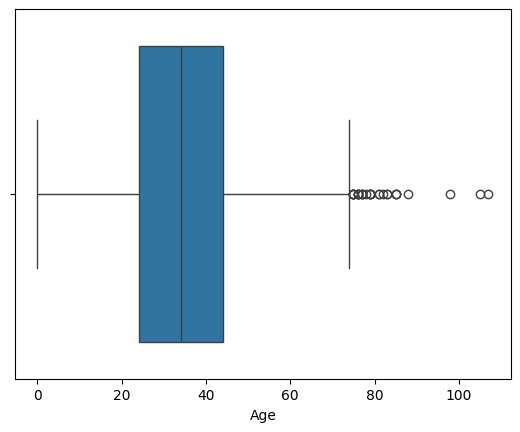

In [31]:
sns.boxplot(data=unique_data,x='Age')
plt.show()

# Project wise O / S / BR

,Status,Total Application
1,Submitted,1087
2,Open,1014
0,Benefit Received,9085
3,Grand Total,11186


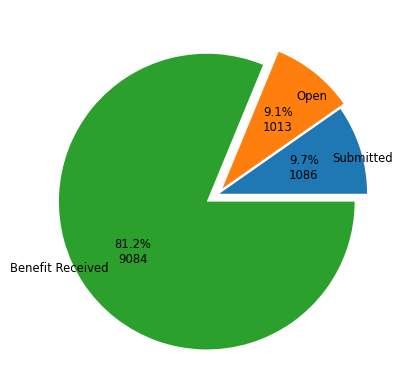

In [32]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

# Changing status values to O_S_BR
projectwise_O_S_BR = pd.DataFrame(unique_data.Status.value_counts())
projectwise_O_S_BR.rename(columns={'count':'Total Application'}, inplace=True)
projectwise_O_S_BR.reset_index(inplace=True)
projectwise_O_S_BR.loc[len(projectwise_O_S_BR.index)] = ['Grand Total', projectwise_O_S_BR['Total Application'].sum()]
try:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,2,0,3]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:3], labels=projectwise_O_S_BR['Status'][0:3], rotatelabels=False, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:3]), explode=[0.01,0.05,0.09], textprops={'fontsize' : 'small'}, labeldistance = 0.8)
except IndexError:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,0,2]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:2], labels=projectwise_O_S_BR['Status'][0:2], rotatelabels=True, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:2]), explode=[0.01,0.05], textprops={'fontsize' : 'small'}, labeldistance = 0.8)

projectwise_O_S_BR

# Districtwise Count

In [33]:
districtWise = pd.pivot_table(data=unique_data, index='District', columns='Status', values='Case Id', aggfunc='count', fill_value=0).reset_index()

if 'Benefit Received' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Open']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Total']]

elif 'Submitted' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Benefit Received', 'Total']]

elif 'Open' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Submitted', 'Benefit Received', 'Total']]

else:
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Benefit Received', 'Total']]
    
    
districtWise

Status,District,Open,Submitted,Benefit Received,Total
0,Dang,271,477,4775,5523
1,Palghar,743,610,4310,5663
2,Grand Total,1014,1087,9085,11186


# Orgwise Scheme Diversity

,State,Total unique schemes,Total Applications,Shcemes with more than 10% application
1,Gujarat,18,5523,"[E-KYC of Ration Card_GJ, Mukhya Mantri Amruta..."
0,Maharashtra,20,5663,"[Mukhyamantri- Mazi Ladki Bahin Yojana_MH, Pra..."


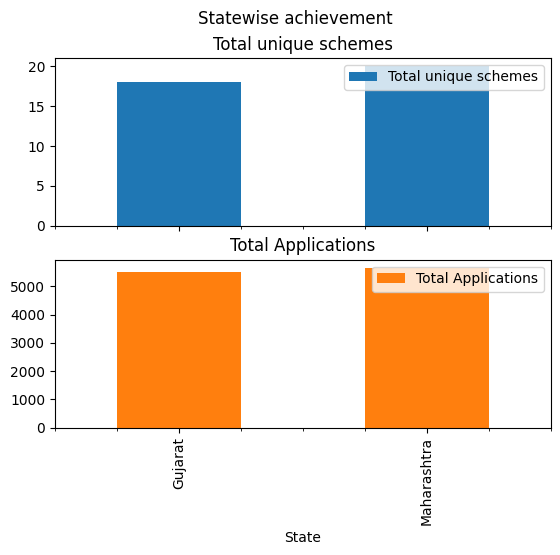

In [34]:
orgSchDiver = unique_data.pivot_table(index=['State','Scheme/Doc'], values='Case Id', aggfunc='count') # Pivoting unique data with "Case Organization" & "Scheme/Doc" rows and count of column "Case Id"
orgSchDiver.reset_index(inplace=True)
Orgwise_Scheme_Diversity = pd.DataFrame(orgSchDiver['State'].value_counts()).reset_index().rename(columns={'count':'Count of unique schemes'}).sort_values('State') # Converting pivot table to pandas data frame
Orgwise_Scheme_Diversity['Total Applications'] = orgSchDiver.groupby(by = 'State')['Case Id'].sum().values # Adding "Total no. of cases" column

'''# 18-35 - DFL Advance/Basic BR
digital_Adult = unique_data[(unique_data['Age'] >= 18) & (unique_data['Age'] <= 35) & (unique_data['Status'] == 'Benefit Received')]
digital_Adult = pd.pivot_table(data=digital_Adult, index = 'Scheme/Doc', values = 'Case Id', aggfunc='count').reset_index()
try:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[1]
except IndexError:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[0]'''

# Shcemes with more than 10% application
orgDict = {} # Declaring a empty dictionary to store Shcemes with more than 10% application
for org in Orgwise_Scheme_Diversity['State']:
    maxApp = pd.DataFrame(orgSchDiver[orgSchDiver['State'] == org].groupby('Scheme/Doc')['Case Id'].sum()
                          >
                          int(orgSchDiver[orgSchDiver['State'] == org]['Case Id'].sum()/10)) # Getting list of more then 10% application
    orgDict[org] = list(maxApp[maxApp['Case Id'] == True].index)
Orgwise_Scheme_Diversity['Shcemes with more than 10% application'] = orgDict.values() # Adding "Shcemes with more than 10% application" column

Orgwise_Scheme_Diversity.rename(columns={"Count of unique schemes":"Total unique schemes"}, inplace=True)
Orgwise_Scheme_Diversity[['State', 'Total unique schemes', 'Total Applications']].set_index('State').plot(kind='bar', title='Statewise achievement', subplots=True)
Orgwise_Scheme_Diversity

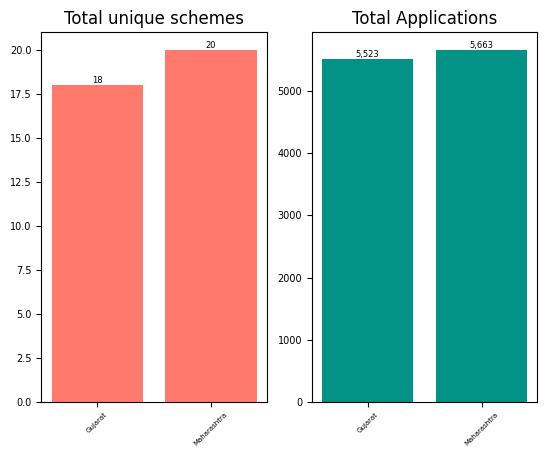

In [35]:
fig, ax = plt.subplots(1,2)
    
bar_container1 = ax[0].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total unique schemes'], color = '#FF796C')
bar_container2 = ax[1].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total Applications'], color = '#029386')

ax[0].tick_params(axis = 'y', labelsize = 7.0)
ax[1].tick_params(axis = 'y', labelsize = 7.0)

ax[0].bar_label(bar_container1, fmt='{:,.0f}', fontsize=6.0)
ax[1].bar_label(bar_container2, fmt='{:,.0f}', fontsize=6.0)

ax[0].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)
ax[1].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)

if len(Orgwise_Scheme_Diversity.State)>1:
    ax[0].set(title = 'Total unique schemes')
    ax[1].set(title = 'Total Applications')
else:
    ax[0].set(title = 'Total unique schemes', ylim = (math.floor(Orgwise_Scheme_Diversity['Total unique schemes'].sum())-1, math.ceil(Orgwise_Scheme_Diversity['Total unique schemes'].sum())+2))
    ax[1].set(title = 'Total Applications', ylim = (math.floor(Orgwise_Scheme_Diversity['Total Applications'].sum()), math.ceil(Orgwise_Scheme_Diversity['Total Applications'].sum())))

# Citizen Scheme Ratio

,Scheme Variety,Total Citizens,Total Cases
0,With 1 scheme,10931,10931
1,With 2 scheme,121,242
2,With 3 scheme,3,9
3,More than 3 schemes,1,4
4,Grand Total,11056,11186


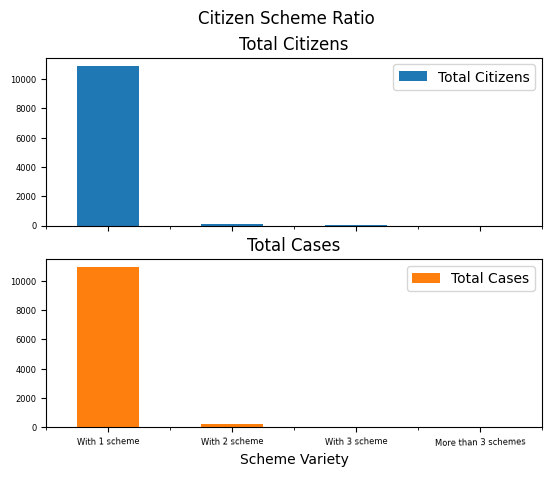

In [36]:
# Scheme variety wise application ratio
cit_sch_ratio = {'Scheme Variety':[],
                 'Total Citizens':[],
                 'Total Cases':[]}

no_of_cases = list(set(unique_data['No of cases'].value_counts().index))
no_of_case = []
no_of_cit = []
for n in no_of_cases:
    if n == 0:
        unique_data.drop(index=(unique_data[unique_data['No of cases'] == n].index), inplace=True)
    
    elif n>0 and n<=3:
        cit_sch_ratio['Scheme Variety'].append('With {0} scheme'.format(n))
        cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
        cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] == n]))
    
    elif n>3:
        if 'More than 3 schemes' in cit_sch_ratio['Scheme Variety']:
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
            
        else:
            cit_sch_ratio['Scheme Variety'].append('More than 3 schemes')
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
    
    else:
        break

# Adding sum of cases and citizens against "More than 3 schemes"
if n>3:
    cit_sch_ratio['Total Cases'].append(sum(no_of_case))
    cit_sch_ratio['Total Citizens'].append(sum(no_of_cit))

# Grand Total
cit_sch_ratio['Scheme Variety'].append('Grand Total')
cit_sch_ratio['Total Citizens'].append(sum(cit_sch_ratio['Total Citizens']))
cit_sch_ratio['Total Cases'].append(sum(cit_sch_ratio['Total Cases']))

# More than 7 schemes
if len(unique_data[unique_data['No of cases'] >= 7]) > 0:
    cit_sch_ratio['Scheme Variety'].append('More than 7 schemes')
    cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] >= 7]))
    cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] >= 7]['Citizen GUID'].value_counts()))

cit_sch_ratio = pd.DataFrame(cit_sch_ratio)
cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')].set_index('Scheme Variety').plot.bar(title='Citizen Scheme Ratio', label = 1, subplots=True, logy=False, log=False, rot=True, fontsize=6, mouseover=True)
cit_sch_ratio

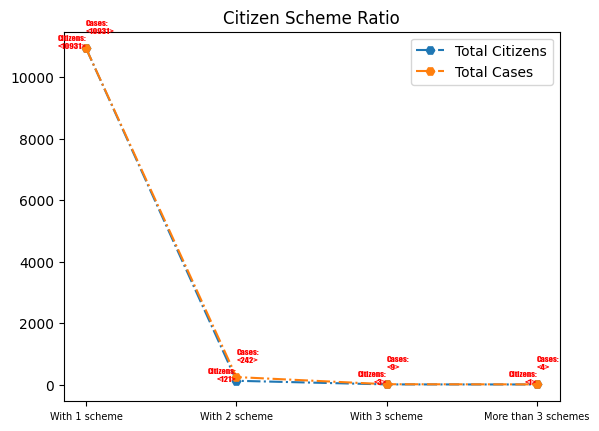

In [37]:
x = cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')]

fig, ax = plt.subplots(1)

ax.plot(x['Scheme Variety'], x[['Total Citizens','Total Cases']], marker = 'H', linestyle = '-.', animated=True)
ax.set_xticklabels(labels=x['Scheme Variety'], fontdict={'fontsize':7.0})
ax.legend(['Total Citizens','Total Cases'])
ax.set(title = 'Citizen Scheme Ratio')
for i, (xi, yi, zi) in enumerate(zip(x['Scheme Variety'], x['Total Citizens'], x['Total Cases'])):
    ax.annotate(f'Citizens:\n<{yi}>', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='right', va='top', fontsize = 6.0, fontname='fantasy', color = 'red')
    ax.annotate(f'Cases:\n<{zi}>', (xi, zi), textcoords="offset points", xytext=(0, 10), ha='left', va='bottom', fontsize = 6.0, fontname='fantasy', color = 'red')

#ax.plot(x['Scheme Variety'], x['Total Cases'], marker = '*', linestyle = '-')
#for i, (xi, yi) in enumerate(zip(x['Scheme Variety'], x['Total Cases'])):
#    ax.annotate(f'{yi}', (xi, yi), textcoords="offset pints", xytext=(0, 10), ha='center', annotation_clip = True)

fig.show()

# Scheme Doc Ratio

,Scheme type,Unique Schemes,Total Applications,Total BV
0,Document,13,1631,84544937
1,Scheme,17,2474,206722705


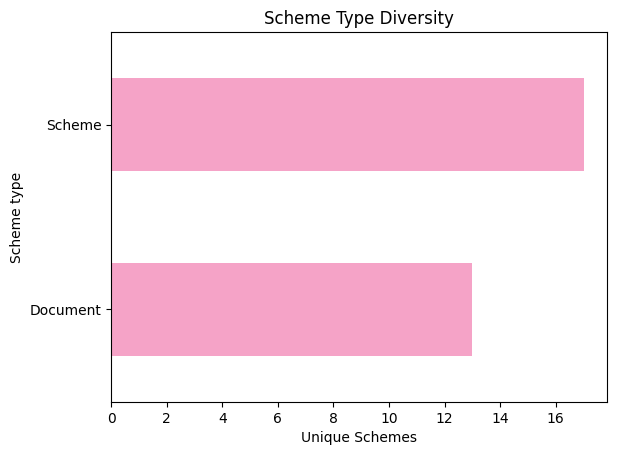

In [38]:
# Scheme type Total application
sch_doc_application = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_application.rename(columns={'Scheme/Doc' : 'Total Applications'}, inplace=True)

# Scheme type Total Benefit value
sch_doc_application['Total BV'] = list(unique_data.groupby(by ='Scheme type')['Benefit Value'].sum())

# Scheme type Total unique schemes
sch_doc_schemes = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].value_counts()).reset_index().drop(columns='count')
sch_doc_schemes = pd.DataFrame(sch_doc_schemes.groupby(by='Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_schemes.rename(columns={'Scheme/Doc' : 'Unique Schemes'}, inplace=True)

# Merging both tables
sch_doc_ratio = sch_doc_schemes.merge(sch_doc_application, on = 'Scheme type', how = 'left')
sch_doc_ratio[['Scheme type','Unique Schemes']].set_index('Scheme type').plot(kind='barh', title='Scheme Type Diversity', color='#F5A3C7', legend=False, xlabel="Unique Schemes")
sch_doc_ratio

# Top Bottom HD

In [39]:
step = unique_data.copy() # Copying data to another variable to make some changes.
step['HD ID'] = step['HD ID'].fillna('a') # Replacing missing values with simple character 'a'
step['HD ID'] = step['HD ID'].astype('str') # Changing HD ID column data type to string so that all values can be converted to lower case.
step['HD ID'] = step['HD ID'].apply(lambda x: x.lower()) # Changing values to lower case.
step1 = pd.pivot_table(data = step, index = ['HD ID', 'HD Name','Scheme/Doc GUID'], values = 'Case Id', aggfunc = 'count') # Pivoting to get unique HD ID/ HD Name/ Scheme Name
step1 = pd.DataFrame(step1.drop(columns='Case Id').reset_index()) # Delete unwanted column 'Case Id'
step1 = pd.DataFrame(pd.pivot_table(data=step1, index=['HD ID','HD Name'], values='Scheme/Doc GUID', aggfunc='count').reset_index()).rename(columns={'Scheme/Doc GUID' : 'Total unique schemes'}) # Pivoting to get unique HD ID/ HD Name and unique count of schemes.
step2 = pd.DataFrame(step.groupby(by = 'HD ID')['Case Id'].count()).reset_index().rename(columns={'Case Id' : 'Total Applications'})
step3 = step.groupby('HD ID')['Benefit Value'].sum().reset_index()
step4 = pd.pivot_table(data=step, index = ['HD ID'], values='HD_Payment', aggfunc='sum').reset_index().rename(columns = {'HD_Payment' : 'Total Payment'}) # Summing up HD payment

step5 = pd.pivot_table(rejectedDF, index=['HD ID'], values='HD_Payment', aggfunc='sum')
top_bottom_hd = step1.merge(step2, on = 'HD ID', how='left').merge(step3, on = 'HD ID', how='left').merge(step4, on = 'HD ID', how='left').merge(step5, on = 'HD ID', how='left')
top_bottom_hd.HD_Payment = top_bottom_hd.HD_Payment.fillna(0)
top_bottom_hd.rename(columns={'Benefit Value':'Benefit Value Delivered', 'HD_Payment' : 'Rejected Payment'}, inplace=True)
top_bottom_hd.loc[len(top_bottom_hd)] = ['Grand Total', '', top_bottom_hd['Total unique schemes'].sum(),
                                         top_bottom_hd['Total Applications'].sum(), top_bottom_hd['Benefit Value Delivered'].sum(),
                                         top_bottom_hd['Total Payment'].sum(), top_bottom_hd['Rejected Payment'].sum()]
top_bottom_hd.tail()

,HD ID,HD Name,Total unique schemes,Total Applications,Benefit Value Delivered,Total Payment,Rejected Payment
44,sunita.pawar.2,Pawar Sunitaben Kantubhai,5,172,10585477,5900.0,270.0
45,sushant.shelar,Supirya Sunil Shelar,3,110,890904,3780.0,0.0
46,umesh.gangoda,Gangoda Umeshbhai Gulabbhai,2,3,398986,95.0,0.0
47,unnati.naik,UNNATI ANIL NAIK,5,48,445502,1640.0,0.0
48,Grand Total,,172,11186,291267642,382760.0,4195.0


# Scheme Categorisation

In [40]:
Scheme_Categorisation = pd.DataFrame(pd.pivot_table(data = unique_data, index=['Scheme type', 'Scheme/Doc', 'Benefit Value'], values='Case Id', aggfunc= 'count')).reset_index()
Scheme_Categorisation['Total BV Delivered'] = Scheme_Categorisation['Benefit Value']*Scheme_Categorisation['Case Id']
Scheme_Categorisation.rename(columns={'Case Id':'Total Applications'}, inplace=True)
Scheme_Categorisation.loc[len(Scheme_Categorisation)] = ['Grand Total', '', '', Scheme_Categorisation['Total Applications'].sum(), Scheme_Categorisation['Total BV Delivered'].sum()]
Scheme_Categorisation.tail()

,Scheme type,Scheme/Doc,Benefit Value,Total Applications,Total BV Delivered
26,Scheme,Pradhan Mantri Peek Vima Yojana (Kharif)_MH,49915,237,11829855
27,Scheme,Ration Card_GJ,46480,2,92960
28,Scheme,Work Demand under MGNREGS_(Central),49861,4,199444
29,Scheme,e-KYC for PM Kisan Samman Nidhi Yojana (Central),19247,6,115482
30,Grand Total,,,4105,291267642


# Schemewise O/S/BR

In [41]:
Sch_O_S_BR = pd.pivot_table(data = unique_data, index='Scheme/Doc', columns='Status', values='Case Id', aggfunc='count', fill_value=0)
Sch_O_S_BR = pd.DataFrame(Sch_O_S_BR).reset_index()
if 'Benefit Received' not in Sch_O_S_BR.columns:
    if 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
elif 'Submitted' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
elif 'Open' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Submitted', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
else:
    Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted', 'Benefit Received']]
    Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted', 'Benefit Received']].sum(axis=1)
    Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(),  Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    
Sch_O_S_BR.tail()

Status,Scheme/Doc,Open,Submitted,Benefit Received,Total
32,VKY Pre Matric Scholarship Scheme and unifrom ...,0,49,171,220
33,Voter ID (Central),6,2,39,47
34,Work Demand under MGNREGS_(Central),4,0,0,4
35,e-KYC for PM Kisan Samman Nidhi Yojana (Central),2,2,2,6
36,Grand Total,1014,1087,9085,11186


# Gender Bifurcation

,Gender,Total Applications,% Contri.
0,Female,7095,63.43
1,Male,4088,36.55
2,Other,3,0.03
3,Total,11186,


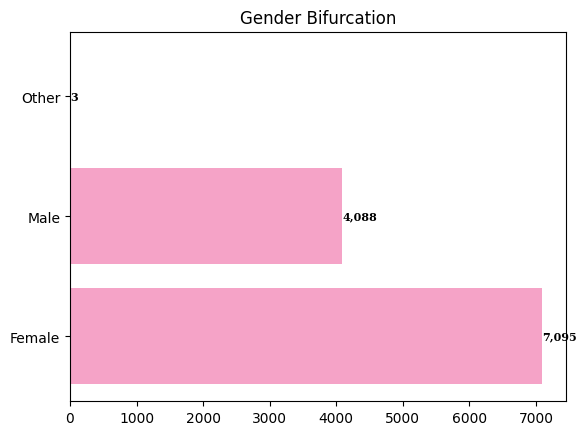

In [42]:
gen_Bif = pd.DataFrame(unique_data['Gender'].value_counts()).reset_index()
gen_Bif['% Contri.'] = round((gen_Bif['count']/unique_data['Gender'].value_counts().sum())*100,2)
gen_Bif.rename(columns={'count':'Total Applications'},inplace=True)
gen_Bif.loc[len(gen_Bif)] = ['Total', gen_Bif['Total Applications'].sum(), '']
fig, ax = plt.subplots(1)

if len(gen_Bif['Gender']) == 4:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:3], y = gen_Bif['Gender'][0:3], width = gen_Bif['Total Applications'][0:3], color = '#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:2], y = gen_Bif['Gender'][0:2], width = gen_Bif['Total Applications'][0:2], color = '#F5A3C7')
else:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:1], y = gen_Bif['Gender'][0:1], width = gen_Bif['Total Applications'][0:1], color = '#F5A3C7')

ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=8.0, fontfamily='serif', fontweight='bold')
ax.set(title = 'Gender Bifurcation')

fig.show()
gen_Bif

# Centrewise Repeat Mobile numbers

In [43]:
repeat_mobile = pd.pivot_table(data=og_DF, index=['District', 'Mobile', 'Citizen GUID'], values='Case Id', aggfunc='count').sort_values(by='Case Id', ascending=False).reset_index()
repeat_mobile = pd.pivot_table(data=repeat_mobile, index=['District', 'Mobile'], values='Citizen GUID', aggfunc='count').sort_values(by='Citizen GUID', ascending=False).reset_index()
repeat_mobile = repeat_mobile[repeat_mobile['Citizen GUID']>5]
if repeat_mobile['Citizen GUID'].sum()>0:
    repeat_mobile.loc[len(repeat_mobile)] = ['Grand Total','',repeat_mobile['Citizen GUID'].sum()]
repeat_mobile.rename(columns={"Citizen GUID":"Total Citizens"}, inplace=True)
repeat_mobile.head()

,District,Mobile,Total Citizens
0,Dang,9510961945.0,24
1,Dang,8320659621.0,22
2,Dang,9106626645.0,20
3,Dang,9316234925.0,19
4,Palghar,8080452019.0,17


# Agewise Citizen Distribution

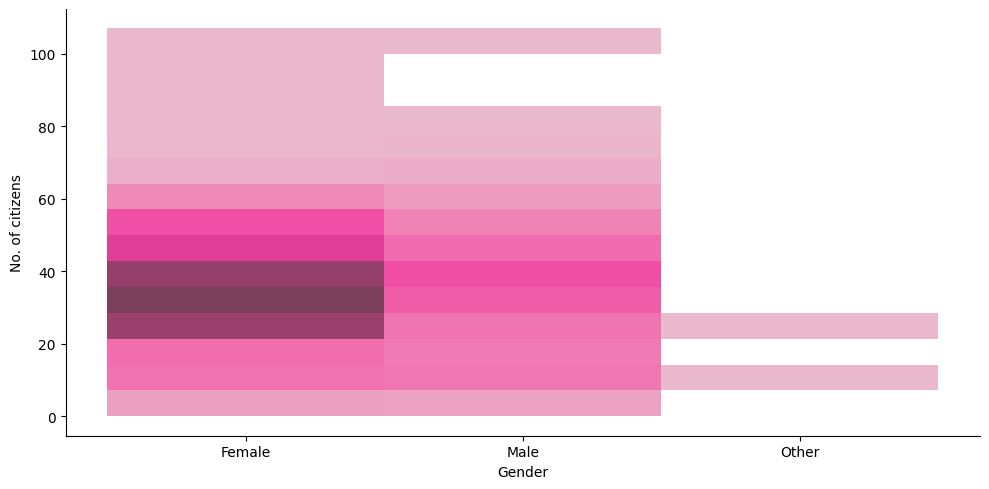

In [44]:
plot = sns.displot(data=unique_data, x='Gender', y='Age', kind='hist', bins=15, legend=True,  color='#F5A3C7', aspect=2)
plot.set(ylabel='No. of citizens')
plt.show()

# E-Gov and DFL Status Summary

In [45]:
eGov_DFL_Summary = pd.pivot_table(data=og_DF, index='District', columns=['Scheme Category','Status'], values='Case Id', aggfunc='count', fill_value=0)
eGov_DFL_Summary['Total'] = eGov_DFL_Summary.sum(axis = 1, numeric_only = 'True').values
eGov_DFL_Summary.sort_values(by='Total',ascending=False, inplace=True)
eGov_DFL_Summary.loc[len(eGov_DFL_Summary)] = eGov_DFL_Summary.sum(axis = 0, numeric_only = 'True').values
eGov_DFL_Summary.rename(index={eGov_DFL_Summary.index[-1]:'Grand Total'}, inplace=True)
eGov_DFL_Summary

Scheme Category            E-Gov                  Total
Status          Benefit Received  Open Submitted       
District                                               
Palghar                     4349   764       616   5729
Dang                        4784   271       477   5532
Grand Total                 9133  1035      1093  11261

# Exporting data to Excel Sheets

In [46]:
# Exporting data of unique records to Excel file.
with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' data.xlsx') as writer:
    unique_data.to_excel(writer, sheet_name='Schemes Data', index=False) # Exporting unique data
    projectwise_O_S_BR.to_excel(writer, sheet_name='projectwise_O_S_BR', index=False)
    districtWise.to_excel(writer, sheet_name='Districtwise achv', index=False)
    if repeat_mobile.shape[0]>0:
        repeat_mobile.to_excel(writer,sheet_name='Repeat_mobile_nos', index=False)
    Orgwise_Scheme_Diversity.to_excel(writer, sheet_name='Orgwise_Scheme_Diversity', index=False)
    cit_sch_ratio.to_excel(writer, sheet_name='Citizen_Scheme_Ratio', index=False)
    sch_doc_ratio.to_excel(writer, sheet_name='Scheme_Doc_Ratio', index=False)
    top_bottom_hd.to_excel(writer, sheet_name='Top_Bottom_HD', index=False)
    Scheme_Categorisation.to_excel(writer, sheet_name='Scheme_Categorisation', index=False)
    Sch_O_S_BR.to_excel(writer, sheet_name='Schwise_O_S_BR', index=False)
    gen_Bif.to_excel(writer, sheet_name='Gender_Bifurcation', index=False)
    if dfl.shape[0]>0:
        eGov_DFL_Summary.to_excel(writer, sheet_name='eGov_DFL_Status_Summary')
        dfl.to_excel(writer, sheet_name='DFL data', index=False)
        dfl_uniques.to_excel(writer, sheet_name='DFL unique data', index=False)
    rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
    duplicateData.to_excel(writer, sheet_name='Duplicate data', index=False) # Exporting duplicate data
    parentDuplicateData.to_excel(writer, sheet_name='Parent Sch Duplicate', index=False) # Exporting parent scheme duplicate data
    #plot.savefig(writer, sheet_name='Age_Dist')

exe_end = dt.now() # Recording execution end time
print('{0} project data exported to Excel!\nTotal {1} unique records exported.\nTotal {2} duplicate records exported.\nTotal {3} rejected records exported'.format(fn.split('_')[2]+' '+fn.split('_')[3],
                                                                                                                                                                   unique_data.shape[0],
                                                                                                                                                                   duplicateData.shape[0],
                                                                                                                                                                   rejectedDF.shape[0]))

LTPCT (Ahwa &amp; Vikramgad) (All States) project data exported to Excel!
Total 11186 unique records exported.
Total 147 duplicate records exported.
Total 141 rejected records exported


# HUL Projection Dashboard Update

In [47]:
if PID == 'PID/HINDU13/2023/MSME-DI/0376':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update HUL projection? (Y/N)")
    if consent in ('y', 'Y'):
        sch_map = {'SH000DPW' : 'Credit', 'SH0003PE':'Credit','SH0003PK':'Credit','SH000888':'Credit','SH0008BK':'Credit','SH0008PZ':'Credit','SH000971':'Credit','SH0009RA':'Credit','SH000AP8':'Credit','SH000BG8':'Credit','SH000CM7':'Credit','SH000D1A':'Credit','SH000DG0':'Credit','DC0008KR':'Formalization','DC0008R0':'Formalization','DC0008WZ':'Formalization','DC00096J':'Formalization','DC0009SJ':'Formalization','DC000A49':'Formalization','DC000DG3':'Formalization','SH0009RR':'YC'}
        unique_data['HUL Category'] = unique_data['Scheme/Doc GUID'].apply(lambda x: sch_map[x])
        unique_data.State = unique_data.State.apply(lambda x: "Delhi" if x=="Haryana" else x)
        col_ord = ['Case Id', 'HUL Category', 'Opsco name', 'Createdon', 'Scheme/Doc', 'Scheme/Doc GUID', 'Status', 'Docket Submitted Date', 'Benefit received Date', 'HD Suspected Cases', 'State', 'District',
     'Citizen GUID', 'Citizen Name', 'Createdon.1', 'Gender', 'Mobile', 'Age', 'Citizen Block', 'Citizen Village', 'Family GUID', 'Family Name', 'HD ID', 'HD Name', 'AMS ID', 'Parent Scheme',
     'Scheme type', 'Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','Scheme Category','duplicate','parent_duplicate','No of cases']
        with pd.ExcelWriter(r'F:\Haqdarshak Data\HUL\HUL - YC and formalisation Plan_Nov 2024.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data[col_ord].to_excel(writer, sheet_name='Schemes Data', index=False)
        print("HUL projection updated!")
    else:
        print("You chose NO to update HUL Projection!")

# Logging the execution process

In [48]:
log = [init_file_size,exe_start.strftime("%d/%m/%Y %H:%M:%S"),exe_end.strftime("%d/%m/%Y %H:%M:%S"),int(round((exe_end-exe_start).total_seconds(),0)),fn.split('_')[2]+' '+fn.split('_')[3],unique_data.shape[0],duplicateData.shape[0],rejectedDF.shape[0]]

lwb = load_workbook(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Loading the workbook
lws = lwb.worksheets[0] # Setting the worksheet
lws.append(log) # Appending the log row
lwb.save(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Saving the logged data
print('Logging Done!\n',log)

Logging Done!
 [3.5, '18/11/2024 16:58:49', '18/11/2024 16:59:52', 63, 'LTPCT (Ahwa &amp; Vikramgad) (All States)', 11186, 147, 141]


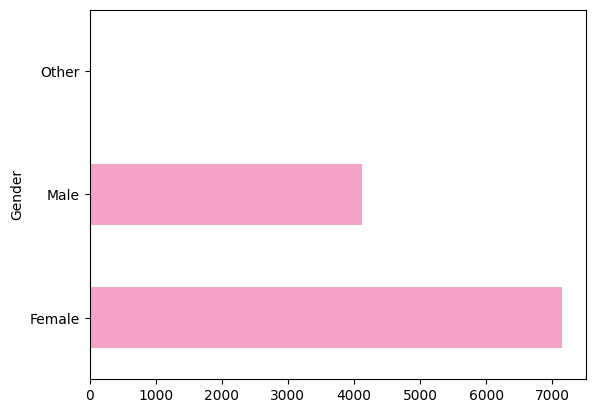

In [49]:
og_DF.Gender.value_counts().plot.barh(color='#F5A3C7')
plt.show()

In [50]:
og_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         11261 non-null  object        
 1   Createdon                       11261 non-null  datetime64[ns]
 2   Scheme/Doc                      11261 non-null  object        
 3   Scheme/Doc GUID                 11261 non-null  object        
 4   Status                          11261 non-null  object        
 5   Docket Submitted Date           10226 non-null  datetime64[ns]
 6   Benefit received Date           9133 non-null   datetime64[ns]
 7   HD Suspected Cases              11261 non-null  object        
 8   State                           11261 non-null  object        
 9   District                        11261 non-null  object        
 10  Citizen GUID                    11261 non-null  object        
 11  Ci

# Exporting original transformed data to excel.

In [51]:
# Notifying user to give consent..
notification = Notify()
notification.title = "Consent Required"
notification.message = "Hello Akash! Waiting for your consent."
notification.audio = "E:/Music/Ringtone/Consent required1.wav"
notification.send()

# Asking consent from user for original data export.
consent = input("Do you want to export original data? (Y/N)\n")

if consent in ["Y","y"]:
    with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' og_data.xlsx') as writer:
        try:
            print("Exporting full data.")
            og_DF.to_excel(writer, sheet_name='Raw Data', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
        except ValueError:
            print("Full data export failed due to excel rows limit exceeded hence exporting data in part.")
            og_DF[og_DF['Scheme Category'] == 'E-Gov'].to_excel(writer, sheet_name='E-Gov', index=False)
            og_DF[og_DF['Scheme Category'] == 'DFL'].to_excel(writer, sheet_name='DFL', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
else:
    print("You dont want original data!")

Do you want to export original data? (Y/N)
 N


You dont want original data!


,Status,Total Application
2,Open,1035
1,Submitted,1093
0,Benefit Received,9133
3,Grand Total,11261


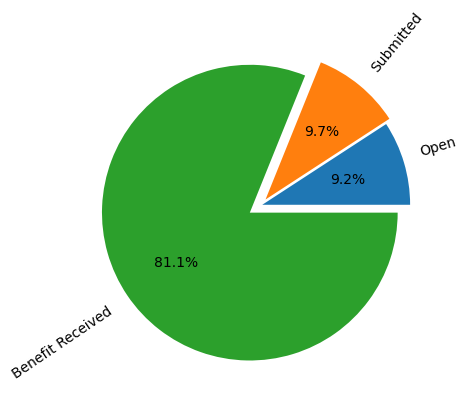

In [52]:
# Changing status values to O_S_BR
og_summary = pd.DataFrame(og_DF[og_DF['Scheme Category']=='E-Gov'].Status.value_counts())
og_summary.rename(columns={'count':'Total Application'}, inplace=True)
og_summary.reset_index(inplace=True)
og_summary.loc[len(og_summary.index)] = ['Grand Total', og_summary['Total Application'].sum()]
try:
    og_summary = og_summary.iloc[[2,1,0,3]]
    plt.pie(og_summary['Total Application'][0:3], labels=og_summary['Status'][0:3], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05,0.09])
except IndexError:
    og_summary = og_summary.iloc[[1,0,2]]
    plt.pie(og_summary['Total Application'][0:2], labels=og_summary['Status'][0:2], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05])
og_summary

# Notifying user using Notification

In [53]:
notification.title = "Process Execution Alert"
notification.message = "Hello Akash! Python script execution has completed."
notification.audio = "E:/Music/Ringtone/Process Execution Alert.wav"
notification.send(block=False)
print('Script execution completed!')

Script execution completed!


In [54]:
unique_data.isna().sum()

Case Id                              0
Createdon                            0
Scheme/Doc                           0
Scheme/Doc GUID                      0
Status                               0
Docket Submitted Date             1014
Benefit received Date             2101
HD Suspected Cases                   0
State                                0
District                             0
Citizen GUID                         0
Citizen Name                         0
Gender                               0
Mobile                               0
Age                                  0
Citizen Block                        2
Citizen Village                      2
Family GUID                          0
Family Name                          0
HD ID                                0
HD Name                              0
Opsco name                           0
AMS ID                               0
Parent Scheme                        0
Scheme type                       7081
Benefit Value            

In [55]:
cat_col = []
num_col = []

for c in unique_data.select_dtypes(exclude='datetime'):
    if unique_data[c].dtype == 'object':
        if c not in ['Case Id','Scheme/Doc GUID','Citizen GUID','Family GUID']:
            cat_col.append(c)
    elif unique_data[c].dtype in ['int64','float64']:
        if c not in ['Mobile','AMS ID']:
            num_col.append(c)    

In [56]:
cat_col

['Scheme/Doc',
 'Status',
 'HD Suspected Cases',
 'State',
 'District',
 'Citizen Name',
 'Gender',
 'Citizen Block',
 'Citizen Village',
 'Family Name',
 'HD ID',
 'HD Name',
 'Opsco name',
 'Parent Scheme',
 'Scheme type',
 'Scheme Category',
 'duplicate',
 'parent_duplicate']

In [57]:
num_col

['Age',
 'Benefit Value',
 'open_price',
 'Docket submitted price',
 'scheme_document_received price',
 'HD_Payment',
 'No of cases']

In [58]:
scaler = StandardScaler()
unique_data_scaled = scaler.fit_transform(unique_data[num_col])
unique_data_scaled_numcol = pd.DataFrame(unique_data_scaled, columns=num_col)
unique_data_scaled_numcol.head()

,Age,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,No of cases
0,-0.881943,0.519529,-0.079355,-0.406315,0.522863,0.306296,-0.146686
1,0.510251,1.319963,-0.079355,-1.653751,1.807315,0.306296,-0.146686
2,-1.279713,1.319963,-0.079355,-1.653751,1.807315,0.306296,-0.146686
3,0.642840,1.319963,-0.079355,-1.653751,1.807315,0.306296,-0.146686
4,0.245071,1.319963,-0.079355,-1.653751,1.807315,0.306296,-0.146686


<Axes: >

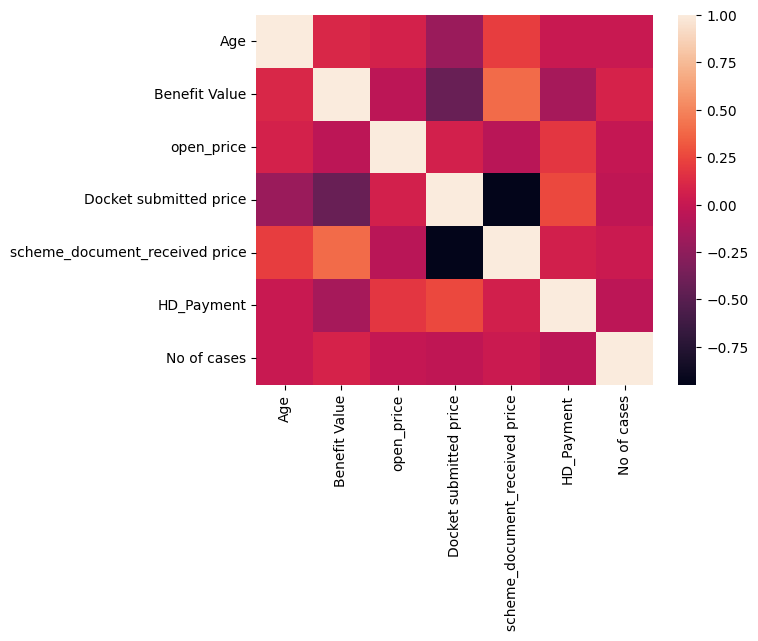

In [59]:
sns.heatmap(unique_data_scaled_numcol.corr())

In [60]:
unique_data_scaled

array([[-0.88194319,  0.51952886, -0.07935508, ...,  0.52286342,
         0.3062962 , -0.14668626],
       [ 0.51025058,  1.31996283, -0.07935508, ...,  1.807315  ,
         0.3062962 , -0.14668626],
       [-1.27971284,  1.31996283, -0.07935508, ...,  1.807315  ,
         0.3062962 , -0.14668626],
       ...,
       [ 0.11248093, -0.56567928, -0.07935508, ..., -0.11936236,
        -1.6515491 , -0.14668626],
       [-0.55046848, -0.56567928, -0.07935508, ..., -0.11936236,
        -1.6515491 , -0.14668626],
       [-0.21899378, -0.56567928, -0.07935508, ..., -0.11936236,
        -1.6515491 , -0.14668626]])

In [61]:
encoder = OneHotEncoder()
#unique_data_scaled = pd.DataFrame(unique_data_scaled, columns=num_col)
unique_data_encode = encoder.fit_transform(unique_data[cat_col])
unique_data_encode = pd.DataFrame(unique_data_encode, index=unique_data.index)
#unique_data_scaled_catcol = pd.DataFrame(unique_data_scaled, columns=cat_col)
#unique_data_scaled_catcol.head()

In [62]:
unique_data_encode.head()

,0
0,"(0, 34)\t1.0\n (0, 37)\t1.0\n (0, 39)\t1.0..."
1,"(0, 27)\t1.0\n (0, 37)\t1.0\n (0, 39)\t1.0..."
2,"(0, 27)\t1.0\n (0, 37)\t1.0\n (0, 39)\t1.0..."
3,"(0, 27)\t1.0\n (0, 37)\t1.0\n (0, 39)\t1.0..."
4,"(0, 27)\t1.0\n (0, 37)\t1.0\n (0, 39)\t1.0..."


In [63]:
try:
    a
except Exception as e:
    print(type(e))

<class 'NameError'>
